In [1]:
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')

plt.rcParams['font.family'] = 'Malgun Gothic'

# 분류모형

분류(classification)문제는 독립변수값이 주어졌을 때 그 값과 가장 연관성이 큰 종속변수 값(class)를 예측하는 문제이다.

즉, 선택해야 할 클래스가 미리 주어진 지도학습의 경우 객관식 시험 문제를 푸는 것과 비슷한 개념이라 설명할 수 있다.

# 분류모형의 종류

분류모형은 크게 두가지 종류로 나눌 수 있다.

1. 확률적 모형
    - 주어진 데이터에 대해 각 클래스가 정답일 조건부확률(conditional probability)를 계산
    
2. 판별함수 모형
    - 주어진 데이터를 카테고리에 따라 서로 다른 영역으로 나누는 경계면(decision boundary)를 찾아 경계면으로부터 주어진 데이터가 어느 위치에 있는지를 계산하는 판별함수(discriminant function)을 이용

여기서 확률적 모형은 다시 두가지로 나뉜다.

- 확률적 판별(discriminative)모형
    - 조건부 확률을 계산하는 방법에 따라 직접 조건부확률 함수의 모양을 추정 

- 확률적 생성(generative)모형
    - 베이즈 정리를 사용해 간접적으로 조건부확률을 구함

- LDA/QDA : 확률적 생성모형

- 나이브 베이지안 : 확률적 생성모형

- 로지스틱 회귀 : 확률적 판별모형

- 의사결정나무 : 확률적 판별모형

- 퍼셉트론 : 판별함수 모형

- 서포트벡터머신 : 판별함수 모형

- 인공신경망 : 판별함수 모형

# 확률적 모형

출력변수 $y$가 $K$개의 클래스 중 하나의 값을 가진다고 가정하면 확률적 모형은 다음과 같이 $x$에 대한 클래스를 예측한다.

1. 입력 $x$가 주어졌을 때의 $y$ 클래스가 $k$일 조건부 확률 $P(y = k | x)$를 모두 계산한다.

$$\begin{split}
\begin{eqnarray}
P_1 &=& P(y=1 \mid x ) \\
\vdots & & \vdots \\
P_K &=& P(y=K \mid x )\\
\end{eqnarray}
\end{split}$$

2. 이 중 가장 확률이 큰 클래스를 선택한다.

$$\hat{y} = \arg\max_{k} P(y=k \mid x )$$

이처럼 조건부 확률을 이용한 분류모형들은 `predict_proba`, `predict_log_proba` 메소드를 지원하는데 이는 독립변수 $x$에 대한 종속변수 $y$의 모든 카테고리 값에 대한 조건부확률 또는 로그를 취한 조건부확률값을 반환한다.

# 확률적 생성모형

확률적 생성모형이란 각 클래스별 특징 데이터의 확률분포 $P(x|y=k)$를 추정한 후 베이즈 정리를 이용해 $P(y=k|x)$를 계산하는 방법이다.

$$P(y=k \mid x) = \dfrac{P(x \mid y=k)P(y=k)}{P(x)}$$

이는 전체 확률의 법칙을 이용해 특징 데이터 $x$의 무조건부 확률분포 $P(x)$를 구할 수 있어 가상의 특징 데이터를 생성하거나 특징 데이터만으로도 아웃라이어 판별이 가능하다.

하지만 클래스가 많은 경우에는 모든 클래스에 대한 확률분포를 추정하는 것이 너무 많은 데이터와 계산량을 필요로 하다는 단점이 있다.

# QDA

QDA(Quadratic Discriminant Analysis)는 조건부확률 기반 생성(generative) 모형의 하나이다.

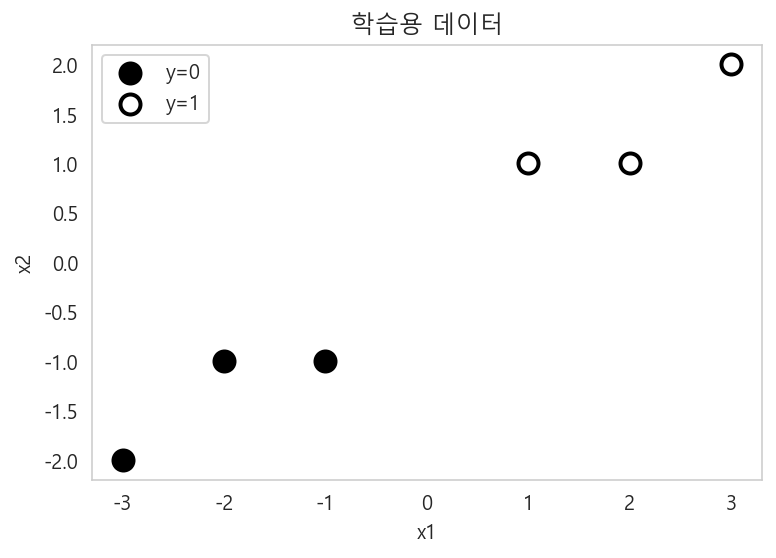

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.title("학습용 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.grid()
plt.show()

위의 분류문제를 QDA 방법으로 푼 결과이다.

In [3]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis().fit(X, y)

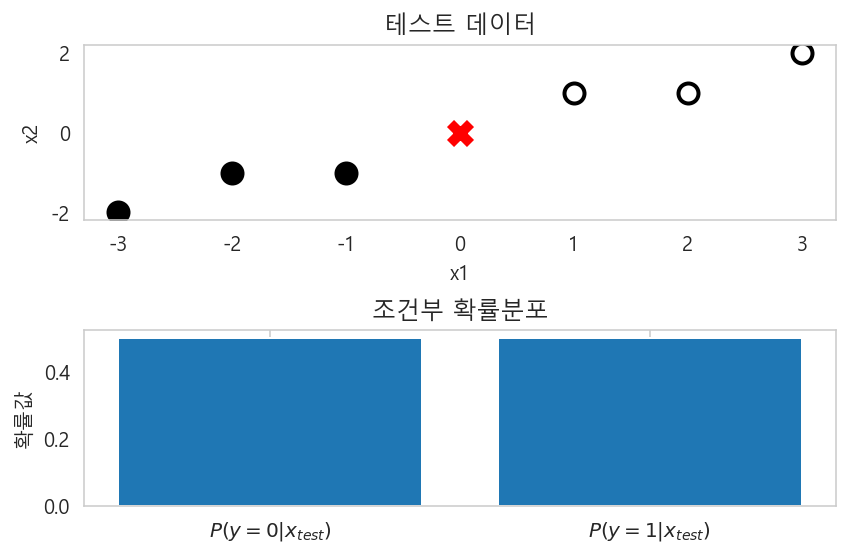

In [4]:
x = [[0, 0]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, edgecolor='k', marker='x', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.grid()
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.grid()
plt.show()

조건부 확률분포를 살펴보면 테스트 데이터가 어떤 클래스에 속할지 알 수 없어 확률이 0.5로 같은 값을 가지게된다.

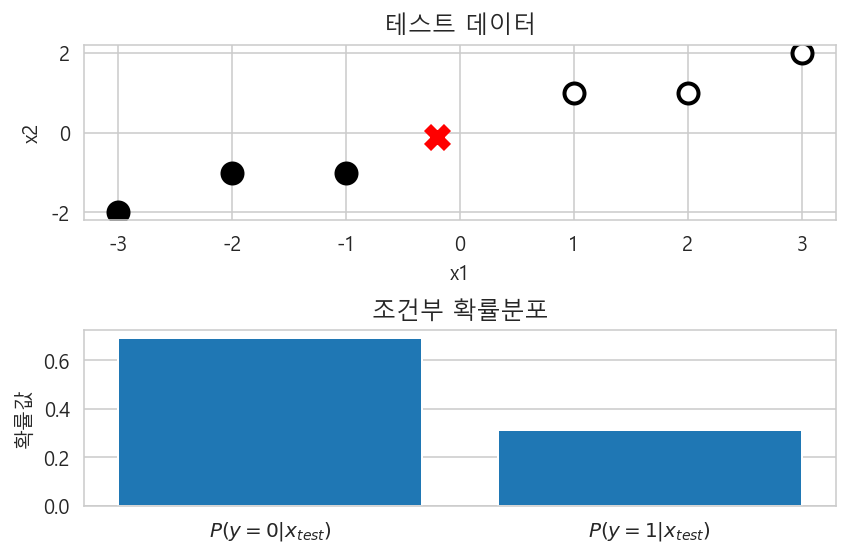

In [5]:
x = [[-0.2, -0.1]]
p = model.predict_proba(x)[0]

plt.subplot(211)
plt.scatter(X[:3, 0], X[:3, 1], c="k", s=100, edgecolor='k', linewidth=2, label="y=0")
plt.scatter(X[3:, 0], X[3:, 1], c="w", s=100, edgecolor='k', linewidth=2, label="y=1")
plt.scatter(x[0][0], x[0][1], c='r', s=100, marker='x', edgecolor='k', linewidth=5)
plt.title("테스트 데이터")
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(212)
plt.bar(model.classes_, p)
plt.title("조건부 확률분포")
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

두 클래스를 구분할 수 있는 임계치를 약간 조정하면 위와 같이 다른 조건부 확률분포를 가지게된다.

# 나이브 베이지안 모형

조건부확률 기반 생성 모형의 장점 중 하나는 클래스가 3개 이상인 다중 클래스의 경우에도 바로 적용이 가능하다는 점이다.

나이브 베이지안(Naive Bayesian)모형도 조건부 확률 모형의 일종으로 20 뉴스그룹 분류문제를 해결한 예시이다.

Pipeline을 이용해 TfidVectorizer와 MultinomialNB 모형을 합쳐 각 텍스트 데이터가 20개의 카테고리에 속할 확률을 계산한다.

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

news = fetch_20newsgroups(subset='all')

# pipeline 생성
model = Pipeline([
    ('vect', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())
])

# model 학습
model.fit(news.data, news.target)

n = 1
x = news.data[n:n + 1]
y = model.predict(x)[0]
print(x[0])
print("=" * 80)
print("실제 클래스:", news.target_names[news.target[n]])
print("예측 클래스:", news.target_names[y])

From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)
Subject: Which high-performance VLB video card?
Summary: Seek recommendations for VLB video card
Nntp-Posting-Host: midway.ecn.uoknor.edu
Organization: Engineering Computer Network, University of Oklahoma, Norman, OK, USA
Keywords: orchid, stealth, vlb
Lines: 21

  My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond Stealth Pro Local Bus

  - Orchid Farenheit 1280

  - ATI Graphics Ultra Pro

  - Any other high-performance VLB card


Please post or email.  Thank you!

  - Matt

-- 
    |  Matthew B. Lawson <------------> (mblawson@essex.ecn.uoknor.edu)  |   
  --+-- "Now I, Nebuchadnezzar, praise and exalt and glorify the King  --+-- 
    |   of heaven, because everything he does is right and all his ways  |   
    |   are just." - Nebuchadnezzar, king of Babylon, 562 B.C.           |   

실제 클래스: comp.sys.ibm.pc.hardware
예측 

실제로 문서의 내용은 어떤 하드웨어에 대한 내용이고 예측클래스 역시 하드웨에 관련한 문서임을 잘 분류했다.

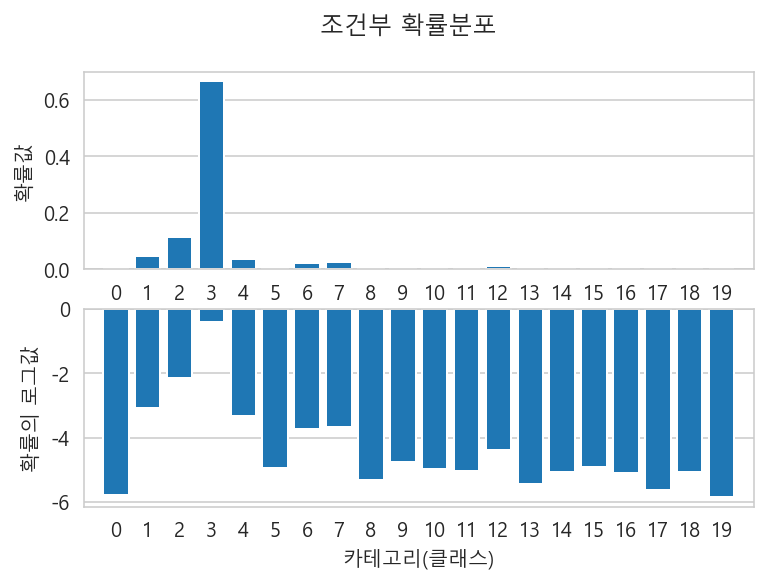

In [7]:
plt.subplot(211)
plt.bar(model.classes_, model.predict_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.subplot(212)
plt.bar(model.classes_, model.predict_log_proba(x)[0])
plt.xlim(-1, 20)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_)
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률의 로그값")
plt.suptitle("조건부 확률분포")
plt.show()

predict_proba를 통해 조건부 확률분포를 확인할 수 있는데 로그 값을 확인하면 아주 작은 값들이 확대되어 더 정확한 비교가 가능해진다.(log를 취해도 최대 최소는 변하지 않기 때문)

# 로지스틱 회귀 모형

로지스틱 회귀 모형은 확률론적 판별 모형에 속하며 QDA, 나이브베이즈와 달리 조건부확률이 $x$에 대한 함수 $f(x)$로 표시될 수 있다고 가정하고 그 함수를 찾아내는 방법이다.

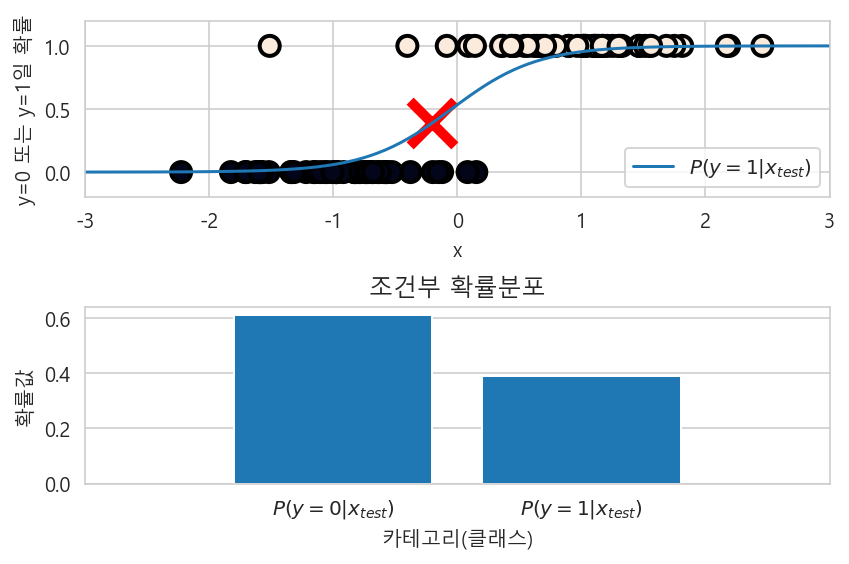

In [8]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X0, y = make_classification(n_features=1, n_redundant=0,
                            n_informative=1, n_clusters_per_class=1, random_state=4)
model = LogisticRegression().fit(X0, y)

xx = np.linspace(-3, 3, 100)
XX = xx[:, np.newaxis]
prob = model.predict_proba(XX)[:, 1]
# prob = 1.0/(1 + np.exp(-model.coef_[0][0]*xx - model.intercept_[0]))

x_test = [[-0.2]]

plt.subplot(211)
plt.plot(xx, prob)
plt.scatter(X0, y, marker='o', c=y, s=100, edgecolor='k', linewidth=2)
plt.scatter(x_test[0], model.predict_proba(x_test)[0][1:], marker='x', s=500, c='r', lw=5)
plt.xlim(-3, 3)
plt.ylim(-.2, 1.2)
plt.xlabel("x")
plt.ylabel("y=0 또는 y=1일 확률")
plt.legend(["$P(y=1|x_{test})$"])
plt.subplot(212)
plt.bar(model.classes_, model.predict_proba(x_test)[0])
plt.xlim(-1, 2)
plt.gca().xaxis.grid(False)
plt.xticks(model.classes_, ["$P(y=0|x_{test})$", "$P(y=1|x_{test})$"])
plt.title("조건부 확률분포")
plt.xlabel("카테고리(클래스)")
plt.ylabel("확률값")
plt.tight_layout()
plt.show()

# 판별함수 모형

판별함수 모형은 동일한 클래스가 모여있는 영역과 그 영역을 나누는 경계면(boundary plane)을 정의하는 것이다.

이 경계면은 경계면으로부터 거리를 계산하는 함수인 **판별함수(discriminant function)**로 정의되며 판별함수 값의 부호에 따라 클래스를 구분한다.

# 퍼셉트론

퍼셉트론(Perceptron)은 가장 단순한 판별함수 모형이다. 다음 그림과 같이 직선이 경계선(boundary line)으로 데이터 영역을 나눈다.

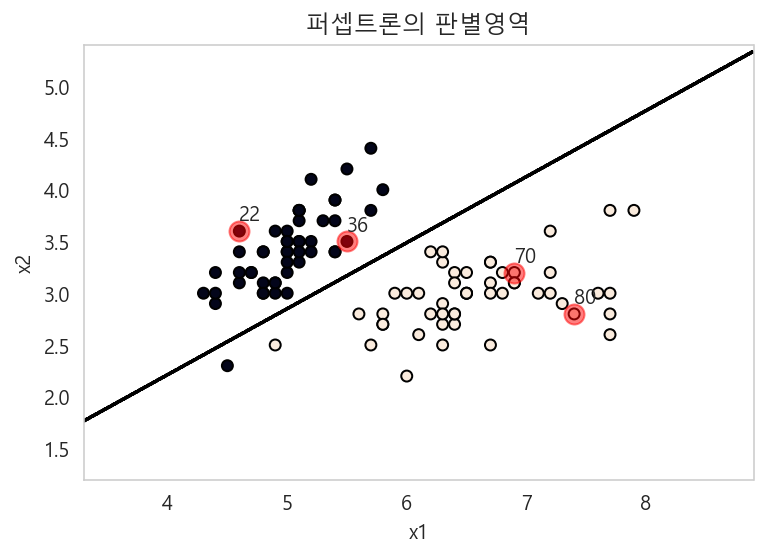

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris
iris = load_iris()
idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, 0:2]
y = iris.target[idx]

model = Perceptron(max_iter=100, eta0=0.1, random_state=1).fit(X, y)
XX_min, XX_max = X[:, 0].min() - 1, X[:, 0].max() + 1
YY_min, YY_max = X[:, 1].min() - 1, X[:, 1].max() + 1
XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                     np.linspace(YY_min, YY_max, 1000))
ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
plt.contour(XX, YY, ZZ, colors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', linewidth=1)

idx = [22, 36, 70, 80]
plt.scatter(X[idx, 0], X[idx, 1], c='r', s=100, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1] + 0.1))
plt.grid(False)
plt.title("퍼셉트론의 판별영역")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

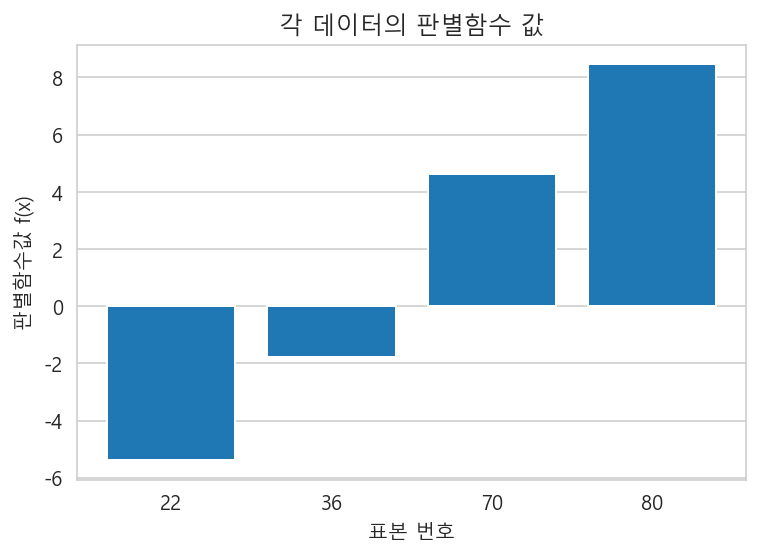

In [10]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.title("각 데이터의 판별함수 값")
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.show()

만약 데이터의 차원이 3차원이라면 다음과 같이 경계면(boundary surface)을 가지게 된다. 이러한 경계면이나 경계선을 의사결정 하이퍼 플레인(decision hyperplane)이라고 한다.

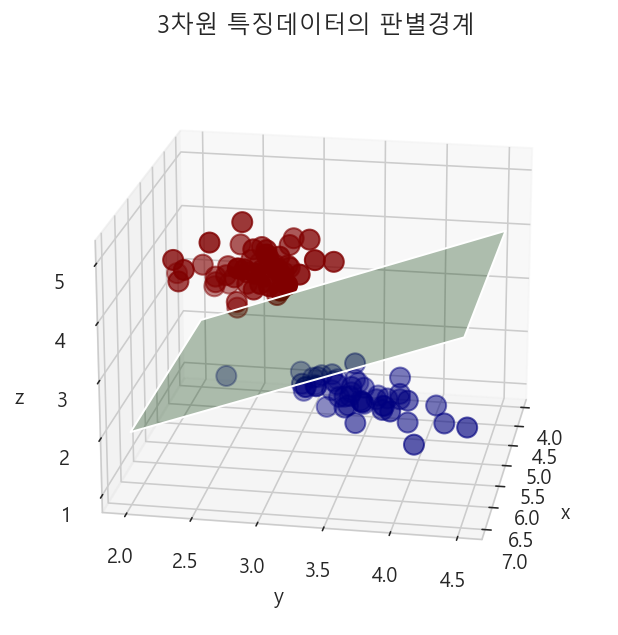

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
idx = np.logical_or(iris.target == 0, iris.target == 1)
X = iris.data[idx, :3]
y = iris.target[idx]

fig = plt.figure()
ax = Axes3D(fig, elev=20, azim=10)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, marker='o', s=100, cmap=mpl.cm.jet)
ax.plot_surface(np.array([[4, 4], [7, 7]]), np.array([[2, 4.5], [2, 4.5]]),
                np.array([[2, 4], [2, 4]]), color='g', alpha=.3)
plt.title("3차원 특징데이터의 판별경계")
plt.xlabel("x")
plt.ylabel("y")
ax.set_zlabel("z")
plt.show()

# 커널 SVM

커널 SVM(Kernel Support Vector Machine)을 사용하면 다음과 같이 복잡한 형태의 경계선을 생성할 수도 있다.

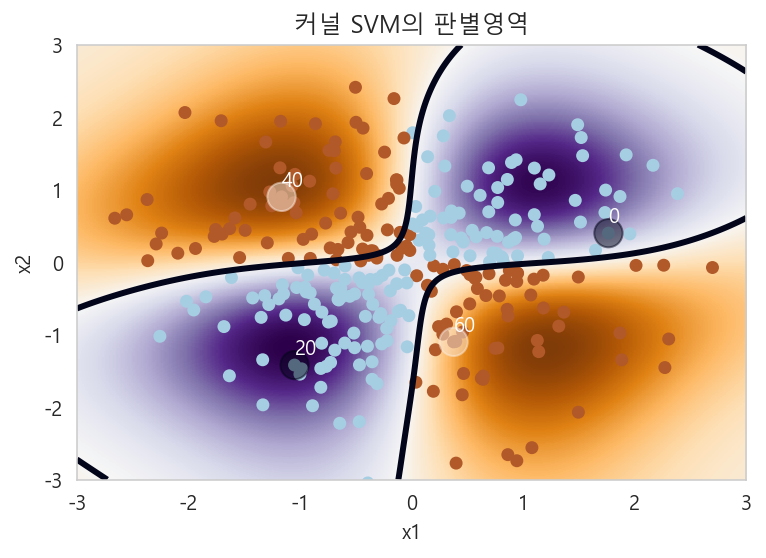

In [12]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("커널 SVM의 판별영역")
plt.show()

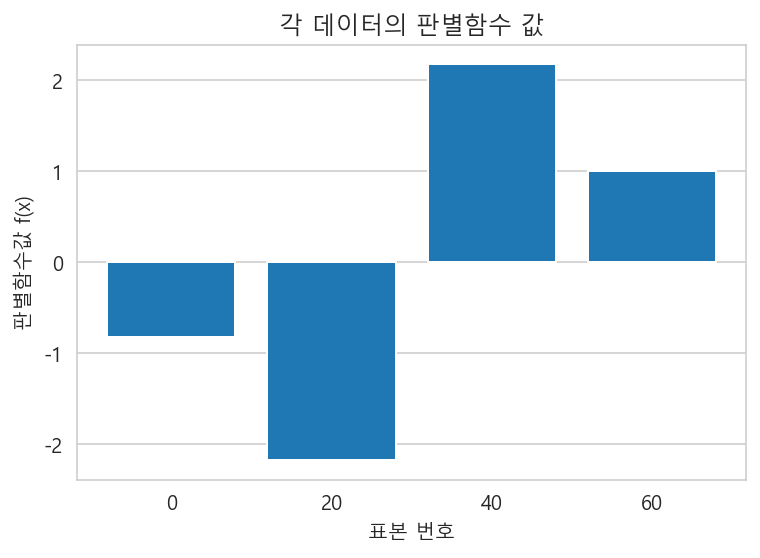

In [13]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.xlabel("표본 번호")
plt.ylabel("판별함수값 f(x)")
plt.title("각 데이터의 판별함수 값")
plt.show()